# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [18]:
dataset_train = pd.read_csv('wti-crude-oil-prices-10-year-daily-chart-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [19]:
training_set.shape

(2495, 1)

### Feature Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 45 timesteps and 1 output

In [21]:
X_train = []
y_train = []
for i in range(45, 2495):
    X_train.append(training_set_scaled[i-45:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [22]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

In [23]:
X_train

array([[[0.76183277],
        [0.76556803],
        [0.768325  ],
        ...,
        [0.70331371],
        [0.69006243],
        [0.67636648]],

       [[0.76556803],
        [0.768325  ],
        [0.7721492 ],
        ...,
        [0.69006243],
        [0.67636648],
        [0.66267053]],

       [[0.768325  ],
        [0.7721492 ],
        [0.76583483],
        ...,
        [0.67636648],
        [0.66267053],
        [0.66311521]],

       ...,

       [[0.62336138],
        [0.63901389],
        [0.6395475 ],
        ...,
        [0.59107807],
        [0.59845965],
        [0.6098433 ]],

       [[0.63901389],
        [0.6395475 ],
        [0.64434998],
        ...,
        [0.59845965],
        [0.6098433 ],
        [0.60450721]],

       [[0.6395475 ],
        [0.64434998],
        [0.65715658],
        ...,
        [0.6098433 ],
        [0.60450721],
        [0.59276783]]])

### Importing the Keras libraries and packages

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [25]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [28]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [29]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [30]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [31]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [32]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
77/77 [==============================] - 12s 58ms/step - loss: 0.0179
Epoch 2/100
77/77 [==============================] - 5s 63ms/step - loss: 0.0040
Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0036
Epoch 4/100
77/77 [==============================] - 5s 59ms/step - loss: 0.0037
Epoch 5/100
77/77 [==============================] - 5s 61ms/step - loss: 0.0034
Epoch 6/100
77/77 [==============================] - 5s 60ms/step - loss: 0.0028
Epoch 7/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0026
Epoch 8/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0027
Epoch 9/100
77/77 [==============================] - 5s 64ms/step - loss: 0.0027
Epoch 10/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0026
Epoch 11/100
77/77 [==============================] - 5s 59ms/step - loss: 0.0024
Epoch 12/100
77/77 [==============================] - 5s 60ms/step - loss: 0.0024
Epoch 13/100
77/77 [====

77/77 [==============================] - 5s 62ms/step - loss: 5.7294e-04
Epoch 99/100
77/77 [==============================] - 5s 61ms/step - loss: 5.4384e-04
Epoch 100/100
77/77 [==============================] - 5s 63ms/step - loss: 6.2615e-04


## Part 3 - Making the predictions and visualising the results

### Getting the crude price of june and july 2024

In [45]:
dataset_test = pd.read_csv('wti-crude-oil-prices-10-year-daily-chart-test.csv')
real_crude_price = dataset_test.iloc[:, 1:2].values

In [46]:
list(dataset_test)

['date', ' value']

### Getting the predicted crude price of june and july 2024

In [58]:
dataset_total = pd.concat((dataset_train[' value'], dataset_test[' value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 45:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(45, 90):
    X_test.append(inputs[i-45:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_crude_price = regressor.predict(X_test)
predicted_crude_price = sc.inverse_transform(predicted_crude_price)

2/2 [==============================] - 0s 23ms/step


### Visualising the results

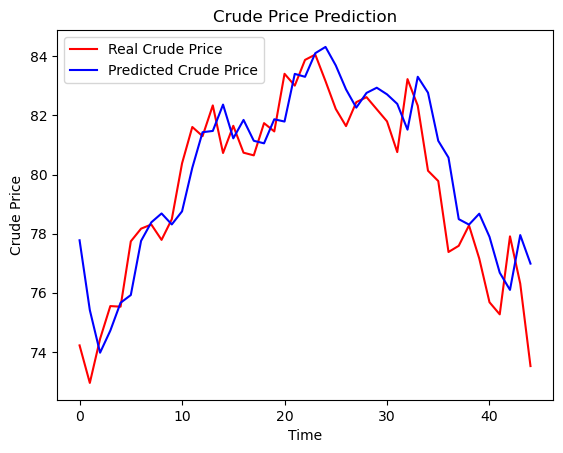

In [59]:
plt.plot(real_crude_price, color = 'red', label = 'Real Crude Price')
plt.plot(predicted_crude_price, color = 'blue', label = 'Predicted Crude Price')
plt.title('Crude Price Prediction')
plt.xlabel('Time')
plt.ylabel('Crude Price')
plt.legend()
plt.show()